Embed cat facts with nomic-enbed-text

UMAP

Question, results, no LLM!

Documents https://umap-learn.readthedocs.io/en/latest/document_embedding.html

remember: RAG fails at global questions directed at an entire document

https://huggingface.co/blog/ngxson/make-your-own-rag

use FAISS as in this? https://github.com/minimaxir/imgbeddings/blob/main/examples/pokemon.ipynb

In [2]:
import requests
import ollama
EMBEDDING_MODEL = 'nomic-embed-text:latest'

import umap
import numpy as np
import matplotlib.pyplot as plt

## Reading and embedding cat facts

In [3]:
cat_facts_url = 'https://huggingface.co/ngxson/demo_simple_rag_py/raw/main/cat-facts.txt'
response = requests.get(cat_facts_url)
cat_facts = response.text.split("\n")

In [4]:
print(cat_facts[0])
embedded_fact = ollama.embed(model=EMBEDDING_MODEL, input=cat_facts[0])
print("This text was converted to a vector of dimension:",len(embedded_fact["embeddings"][0]))

On average, cats spend 2/3 of every day sleeping. That means a nine-year-old cat has been awake for only three years of its life.
This text was converted to a vector of dimension: 768


Let's embed all the facts, and keep the embedding stored in a list:

In [53]:
%%time
EMBEDDED_FACTS = []

for fact in cat_facts:
    EMBEDDED_FACTS.append( ollama.embed(model=EMBEDDING_MODEL, input=fact)["embeddings"][0] )

CPU times: user 221 ms, sys: 20.4 ms, total: 241 ms
Wall time: 3.03 s


I am also going to embed facts about computers, to see where they end up being embedded:

In [54]:
computer_facts = """The first modern computer was basically a giant calculator.
Computers work through special instructions called algorithms.
Phones are computers.
A computers memory is called RAM.
The Fugaku supercomputer in Japan can do 442 quadrillion calculations per second.""".split("\n")
for fact in computer_facts:
    EMBEDDED_FACTS.append( ollama.embed(model=EMBEDDING_MODEL, input=fact)["embeddings"][0] )

## Visualising the embedding

Since each piece of text gets summarised as a point in a 768-dimension space, the embedding itself is difficult to visualise. Here I use UMAP to flatten it into a 2D space.

/Users/tristan/playground/gen-ai-ollama/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/tristan/playground/gen-ai-ollama/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


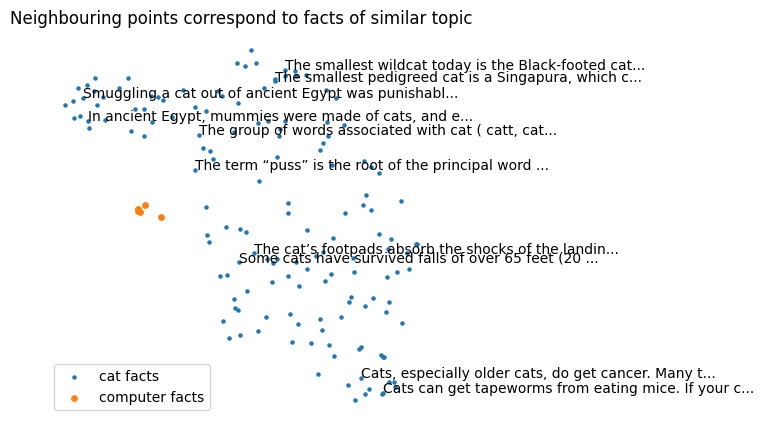

In [67]:
facts_2d = umap.UMAP(metric="cosine",random_state=0).fit_transform(EMBEDDED_FACTS)


plt.figure(figsize=(5,5))
plt.title("Neighbouring points correspond to facts of similar topic")

plt.scatter(facts_2d[:,0], facts_2d[:,1], s=5, label="cat facts")
plt.scatter(facts_2d[150:,0], facts_2d[150:,1], s=15, label="computer facts")
plt.legend()

plt.gca().set_axis_off()
# write a few of the facts:
for i_fact in [15,16,126,118,28,141,31,36,109,22]:
    plt.text(facts_2d[i_fact,0], facts_2d[i_fact,1], cat_facts[i_fact][:50]+"...")

#for i_fact in range(len(cat_facts)):
#    plt.text(facts_2d[i_fact,0], facts_2d[i_fact,1], str(i_fact))